<a href="https://colab.research.google.com/github/clopezv/Challenger_TelecomX/blob/main/TelecomX_LATAM_CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#7267 rows × 6 columns
df = pd.read_json('/content/TelecomX_Data.json', encoding="utf-8")
#df = pd.DataFrame(data)
#nulos = df['Churn'].isnull().sum()
#print(f' Nulos: {nulos}')
#df.head()
#df = pd.json_normalize(df['customer'])
#df['customerID'] = df['customerID'].astype(str)
#df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})
#df['Churn'].dtype

df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [166]:
CountChurn = df['Churn'].value_counts(dropna=True)
CountChurn

#Clientes que dejaron la empresa 1869 y los que no 5174 y 224 registros que son nulos o vacios


,count
Churn,
No,5174
Yes,1869
,224


###**Gráfico Churn**

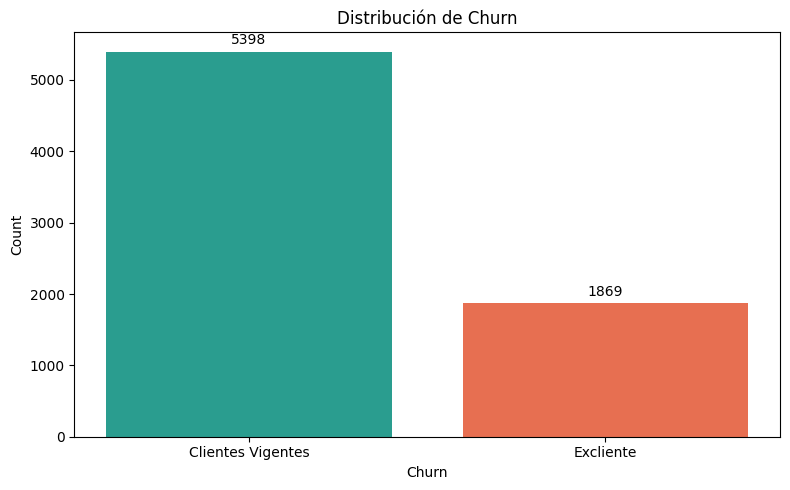

In [167]:
labels = ['Clientes Vigentes', 'Excliente']
counts = [5398, 1869]
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#2a9d8f', '#e76f51']
bars = ax.bar(labels, counts, color=colors)
ax.set_title('Distribución de Churn')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
# Añadir valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
# Mejorar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [168]:
#CountMaleFemale = df['gender'].value_counts(dropna=True)
data = pd.json_normalize(df['customer'])
CountMaleFemale = data['gender'].describe()
CountMaleFemale

#Se encuentran registrados 3675 clientes Masculinos y 3592 Femeninos

,gender
count,7267
unique,2
top,Male
freq,3675


In [169]:
data = pd.json_normalize(df['phone'])
#CountServiciosPhone = data[['PhoneService', 'MultipleLines']].describe()
CountServiciosPhone = data['PhoneService'].value_counts(dropna=True)
CountServiciosPhone
#6560 clientes tienen PhoneService y 707 no tienen el servicio

,count
PhoneService,
Yes,6560
No,707


In [170]:
CountMultipleLinesPhone = data['MultipleLines'].value_counts(dropna=True)
CountMultipleLinesPhone
#3495 clientes no tienen MultipleLines y 3065 si tienen y 707 registran "No phone service"

,count
MultipleLines,
No,3495
Yes,3065
No phone service,707


In [171]:
resultado = df[(data['PhoneService'] == 'Yes') & (data['MultipleLines'] == 'Yes')].shape[0]
resultado
#Existen 3065 clientes que tienen los 2 servicios

3065

In [172]:
resultado = df[(data['PhoneService'] == 'No') & (data['MultipleLines'] == 'No')].shape[0]
resultado
#Existen 0 clientes que tienen "No" en los 2 servicios

0

In [173]:
resultado = df[(data['PhoneService'] == 'No') & (data['MultipleLines'] == 'No phone service')].shape[0]
resultado
#Se confirma que 707 clientes no tienen ningún servicio

707

In [174]:
internet = pd.json_normalize(df['internet'])
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [175]:
CountInternetService = internet['InternetService'].value_counts(dropna=True)
CountInternetService
#3198 clientes tienen internet Fiber optic, 2488 tienen servicio DSL y 1581 no tienen servicio internet
#valores_unicos = pd.unique(df['Columna1'])
#pandas.Series.dt.normalize() para trabajar con fechas

,count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [176]:
IDduplicados = df[df.duplicated(subset='customerID', keep=False)]
IDduplicados
#No existen customerID duplicados

,customerID,Churn,customer,phone,internet,account


In [177]:
Account = pd.json_normalize(df['account'])
Account.head()


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [178]:
CountAccount = Account['Contract'].value_counts(dropna=True)
CountAccount
#Contratos de Month-to-month 4005, contratos de Two year 1743 y contratos de One year 1519

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [179]:
PaperlessBilling = Account['PaperlessBilling'].value_counts(dropna=True)
PaperlessBilling
#Total 7.267

,count
PaperlessBilling,
Yes,4311
No,2956


In [180]:
PaymentMethod = Account['PaymentMethod'].value_counts(dropna=True)
PaymentMethod
#Total 7.267

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [181]:
#ChargesMonthly = Account['Charges.Monthly'].value_counts(dropna=True)
#ChargesMonthly
ChargesMonthly = Account['Charges.Monthly'].describe()
ChargesMonthly
#ChargesMonthly = Account['Charges.Monthly'].max()
#ChargesMonthly
#ChargesMonthly = Account['Charges.Monthly'].min()
#ChargesMonthly

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [182]:
#ChargesTotal = Account['Charges.Total'].describe()
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].max() #999.9
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].min() #
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].value_counts(dropna=True)
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].isnull().sum()
#ChargesTotal
#ChargesTotal = Account['Charges.Total'].astype(float)
#ChargesTotal = ChargesTotal.str.replace(' ', '')
#ChargesTotal
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
#filas_con_espacios = Account['Charges.Total'].str.contains(r'\s', na=False)
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
#resultado = df[filas_con_espacios[['customerID', 'Charges.Total']]]
###filas_con_espacios
####print(Account.columns)
#New código
#change_cero = df[Account['Charges.Total'].str.replace(r'\s+', '0', regex=True)]
#change_cero
#change_cero = df[Account['Charges.Total'].str.contains(r'\s', '0', regex=True)]
#change_cero
#change_cero.to_csv('check_cambio.csv', index=False)

#internet = pd.json_normalize(df['internet'])
#change_cero
#filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False
##Fin
filas_con_espacios = df[Account['Charges.Total'].str.contains(r'\s', na=False)]
resultado = filas_con_espacios['customerID']
resultado

####Estos clientes tienen el campo Charges.Total en blanco

,customerID
975,1371-DWPAZ
1775,2520-SGTTA
1955,2775-SEFEE
2075,2923-ARZLG
2232,3115-CZMZD
2308,3213-VVOLG
2930,4075-WKNIU
3134,4367-NUYAO
3203,4472-LVYGI
4169,5709-LVOEQ


In [183]:

ChargesDaily = Account['Charges.Monthly'] / 30
ChargesDaily
df['Cuentas_Diarias'] = ChargesDaily
df.head()
#Creación de columna cuentas diarias

,customerID,Churn,customer,phone,internet,account,Cuentas_Diarias
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",2.186667
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",1.996667
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.463333
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",3.266667
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",2.796667


In [184]:
#convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0)
df['Churn'] = df['Churn'].fillna('No')  # si son NaN (valores nulos)
df['Churn'] = df['Churn'].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)
CountChurn = df['Churn'].value_counts(dropna=True)
CountChurn

#df[Account['Charges.Total'].str.contains(r'\s', '0', regex=True)]
#df['Churn'] = df['Churn'].map({'No': '\s'})
#CountChurn = df['Churn'].value_counts(dropna=True)
#CountChurn

#df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
#df.head()

<ipython-input-184-324579e6c2b9>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,count
Churn,
0,5398
1,1869


In [185]:
data = pd.json_normalize(df['customer'])
data


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [186]:
data[['Partner', 'Dependents']]

,Partner,Dependents
0,Yes,Yes
1,No,No
2,No,No
3,Yes,No
4,Yes,No
...,...,...
7262,No,No
7263,Yes,No
7264,No,No
7265,Yes,Yes


In [187]:
#convertir valores textuales Columnas ['Partner', 'Dependents'] como "Sí" y "No" en valores binarios (1 y 0)
for col in [['Partner', 'Dependents']]:
    #print(col)
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    data[col] = data[col].astype(int)
data[['Partner', 'Dependents']]

<ipython-input-187-fc75bebae256>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Partner,Dependents
0,1,1
1,0,0
2,0,0
3,1,0
4,1,0
...,...,...
7262,0,0
7263,1,0
7264,0,0
7265,1,1


In [188]:
#convertir valores textuales Columnas ['PhoneService', 'MultipleLines'] como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['phone'])
#data
for col in [['PhoneService', 'MultipleLines']]:
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    #data[col] = data[col].astype(int)
data[['PhoneService', 'MultipleLines']]

<ipython-input-188-42774f15317e>:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0
...,...,...
7262,1,0
7263,1,1
7264,1,0
7265,1,0


In [189]:
#convertir valores textuales Columnas ['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['internet'])
for col in [['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]:
    data[col] = data[col].fillna('No')  # si son NaN (valores nulos)
    data[col] = data[col].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
    data[col] = data[col].replace({'Yes': 1, 'No': 0})
    #data[col] = data[col].astype(int)
data[['OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,1,0,1,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,0,1,1,0,1,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
7262,1,0,0,1,0,0
7263,0,0,0,0,0,1
7264,0,1,0,0,0,0
7265,1,0,1,1,0,1


In [190]:
#convertir valores textuales Columna ['PaperlessBilling'] como "Sí" y "No" en valores binarios (1 y 0)
data = pd.json_normalize(df['account'])
#data['PaperlessBilling']
data['PaperlessBilling'] = data['PaperlessBilling'].fillna('No')  # si son NaN (valores nulos)
data['PaperlessBilling'] = data['PaperlessBilling'].replace(r'^\s*$', 'No', regex=True)  # si son strings vacíos o con espacios
data['PaperlessBilling'] = data['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].astype(int)
data['PaperlessBilling']

<ipython-input-190-1547bbc80de6>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,PaperlessBilling
0,1
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,1
7265,0


In [191]:
#Análisis descriptivo Churn
AnalisisChurn = df['Churn'].describe()
AnalisisChurn

,Churn
count,7267.000000
mean,0.257190
std,0.437115
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [204]:
#Análisis descriptivo
AnalisisCustomer = pd.json_normalize(df['customer'])
DisplayCustomer = AnalisisCustomer[['gender','SeniorCitizen','Partner','Dependents','tenure']].describe()
DisplayCustomer


,SeniorCitizen,tenure
count,7267.000000,7267.000000
mean,0.162653,32.346498
std,0.369074,24.571773
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [193]:
#Análisis descriptivo
AnalisisCustomer = pd.json_normalize(df['phone']).describe()
AnalisisCustomer

,PhoneService,MultipleLines
count,7267,7267
unique,2,3
top,Yes,No
freq,6560,3495


In [194]:
#Análisis descriptivo
AnalisisInternet = pd.json_normalize(df['internet']).describe()
AnalisisInternet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7267,7267,7267,7267,7267,7267,7267
unique,3,3,3,3,3,3,3
top,Fiber optic,No,No,No,No,No,No
freq,3198,3608,3182,3195,3582,2896,2870


In [195]:
#Análisis descriptivo
normalized_account = pd.json_normalize(df['account'])
Charges_Monthly = normalized_account['Charges.Monthly']

AnalisisAccount = Charges_Monthly.describe()
AnalisisAccount

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000


In [196]:
#Análisis descriptivo
normalized_account = pd.json_normalize(df['account'])
Charges_Total = normalized_account['Charges.Total']
AnalisisAccount = Charges_Total.describe()
AnalisisAccount

,Charges.Total
count,7267
unique,6531
top,20.2
freq,11


In [197]:
#Se crea nuevo DataFrame para normalizar el Churn y dejar el campo en 0, 1 para reliazar un mejor análisis.
df_nuevo = pd.DataFrame(index=df.index)
df_nuevo['Churn'] = df['Churn']
data = pd.json_normalize(df['customer'])
df_nuevo['gender'] = data['gender']
data = pd.json_normalize(df['account'])
df_nuevo['Contract'] = data['Contract']
df_nuevo['PaymentMethod'] = data['PaymentMethod']
df_nuevo

,Churn,gender,Contract,PaymentMethod
0,0,Female,One year,Mailed check
1,0,Male,Month-to-month,Mailed check
2,1,Male,Month-to-month,Electronic check
3,1,Male,Month-to-month,Electronic check
4,1,Female,Month-to-month,Mailed check
...,...,...,...,...
7262,0,Female,One year,Mailed check
7263,1,Male,Month-to-month,Electronic check
7264,0,Male,Month-to-month,Mailed check
7265,0,Male,Two year,Mailed check


In [198]:
#"Sí" y "No" en valores binarios (1 y 0)
df_nuevo.value_counts(dropna=True)
#clientes que dejaron la empresa tienen la tendencia a ser Masculino con contrato
#mes a mes y pagan con cheque electronico y Femeninas 492

Churn  gender  Contract        PaymentMethod            
1      Male    Month-to-month  Electronic check             502
       Female  Month-to-month  Electronic check             492
0      Female  Month-to-month  Electronic check             463
       Male    Month-to-month  Electronic check             458
                               Mailed check                 347
               Two year        Credit card (automatic)      298
       Female  Month-to-month  Mailed check                 296
               Two year        Credit card (automatic)      287
                               Bank transfer (automatic)    287
       Male    Two year        Bank transfer (automatic)    274
       Female  Month-to-month  Bank transfer (automatic)    208
       Male    Month-to-month  Credit card (automatic)      206
                               Bank transfer (automatic)    199
       Female  Two year        Mailed check                 198
       Male    Two year        Mailed check                 193
               One year        Credit card (automatic)      189
       Female  One year        Credit card (automatic)      183
                               Bank transfer (automatic)    182
       Male    One year        Bank transfer (automatic)    181
       Female  Month-to-month  Credit card (automatic)      173
       Male    One year        Mailed check                 167
       Female  One year        Mailed check                 156
       Male    One year        Electronic check             151
1      Male    Month-to-month  Mailed check                 147
0      Female  One year        Electronic check             144
1      Female  Month-to-month  Mailed check                 135
                               Bank transfer (automatic)    112
                               Credit card (automatic)      103
       Male    Month-to-month  Bank transfer (automatic)     89
0      Male    Two year        Electronic check              82
       Female  Two year        Electronic check              76
1      Male    Month-to-month  Credit card (automatic)       75
               One year        Electronic check              41
       Female  One year        Electronic check              23
                               Credit card (automatic)       22
       Male    One year        Bank transfer (automatic)     21
                               Credit card (automatic)       19
       Female  One year        Bank transfer (automatic)     17
                               Mailed check                  13
       Male    Two year        Bank transfer (automatic)     12
               One year        Mailed check                  10
               Two year        Credit card (automatic)        7
       Female  Two year        Bank transfer (automatic)      7
                               Electronic check               7
       Male    Two year        Electronic check               6
       Female  Two year        Credit card (automatic)        6
                               Mailed check                   2
       Male    Two year        Mailed check                   1
Name: count, dtype: int64

In [199]:
#Conteo de evasión por variables numéricas
data_customer = pd.json_normalize(df['customer'])
df_normalized_customer = pd.concat([df.reset_index(drop=True), data_customer.reset_index(drop=True)], axis=1)


data_account = pd.json_normalize(df['account'])

charges_data = data_account[['Charges.Monthly', 'Charges.Total']]

df_churn_intermediate = df_normalized_customer[df_normalized_customer['Churn'] == 1][['customerID', 'Churn', 'tenure']].reset_index(drop=True)
charges_data_filtered = charges_data[df_normalized_customer['Churn'] == 1].reset_index(drop=True)

df_churn_final = pd.concat([df_churn_intermediate, charges_data_filtered], axis=1)
df_churn_final

,customerID,Churn,tenure,Charges.Monthly,Charges.Total
0,0004-TLHLJ,1,4,73.90,280.85
1,0011-IGKFF,1,13,98.00,1237.85
2,0013-EXCHZ,1,3,83.90,267.4
3,0022-TCJCI,1,45,62.70,2791.5
4,0023-HGHWL,1,1,25.10,25.1
...,...,...,...,...,...
1864,9961-JBNMK,1,21,96.80,2030.3
1865,9965-YOKZB,1,9,83.85,790.15
1866,9985-MWVIX,1,1,70.15,70.15
1867,9986-BONCE,1,4,20.95,85.5


In [200]:
#Conteo de evasión por variables numéricas
data_customer = pd.json_normalize(df['customer'])
df_normalized_customer = pd.concat([df.reset_index(drop=True), data_customer.reset_index(drop=True)], axis=1)


data_account = pd.json_normalize(df['account'])

charges_data = data_account[['Charges.Monthly', 'Charges.Total']]

df_churn_intermediate = df_normalized_customer[df_normalized_customer['Churn'] == 0][['customerID', 'Churn', 'tenure']].reset_index(drop=True)
charges_data_filtered = charges_data[df_normalized_customer['Churn'] == 0].reset_index(drop=True)

df_churn_final = pd.concat([df_churn_intermediate, charges_data_filtered], axis=1)
df_churn_final

,customerID,Churn,tenure,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,9,65.60,593.3
1,0003-MKNFE,0,9,59.90,542.4
2,0013-MHZWF,0,9,69.40,571.45
3,0013-SMEOE,0,71,109.70,7904.25
4,0014-BMAQU,0,63,84.65,5377.8
...,...,...,...,...,...
5393,9979-RGMZT,0,7,94.05,633.45
5394,9987-LUTYD,0,13,55.15,742.9
5395,9992-UJOEL,0,2,50.30,92.75
5396,9993-LHIEB,0,67,67.85,4627.65


#📊 Carga y análisis

#📄Informe final

###**Introducción**

En el dinámico y competitivo sector de las telecomunicaciones, retener a los clientes se ha convertido en un desafío clave para las empresas. Telecom X no es la excepción, ya que actualmente enfrenta una alta tasa de cancelación de servicios por parte de sus usuarios. Comprender las razones detrás de esta pérdida de clientes es fundamental para diseñar estrategias efectivas de fidelización y mejorar la toma de decisiones del negocio.

En este contexto, has sido contratado como asistente de análisis de datos para formar parte del proyecto "Churn de Clientes". Tu principal desafío será recopilar, procesar y analizar información relevante utilizando Python y sus bibliotecas especializadas. El objetivo es identificar patrones y factores que influyen en la cancelación de servicios, generando así información valiosa que servirá de base para que el equipo de Data Science desarrolle modelos predictivos y proponga soluciones que reduzcan la evasión de clientes.

Se identificaron **1,869 clientes que abandonaron la empresa,** mientras que **5,174 permanecieron activos**. Además, se encontraron **224 registros con valores nulos o vacíos,** los cuales requieren revisión o limpieza antes del análisis.

Los 224 registros con valores nulos o vacíos fueron clasificados provisionalmente como clientes vigentes, con el fin de facilitar un análisis más coherente y uniforme de los datos.

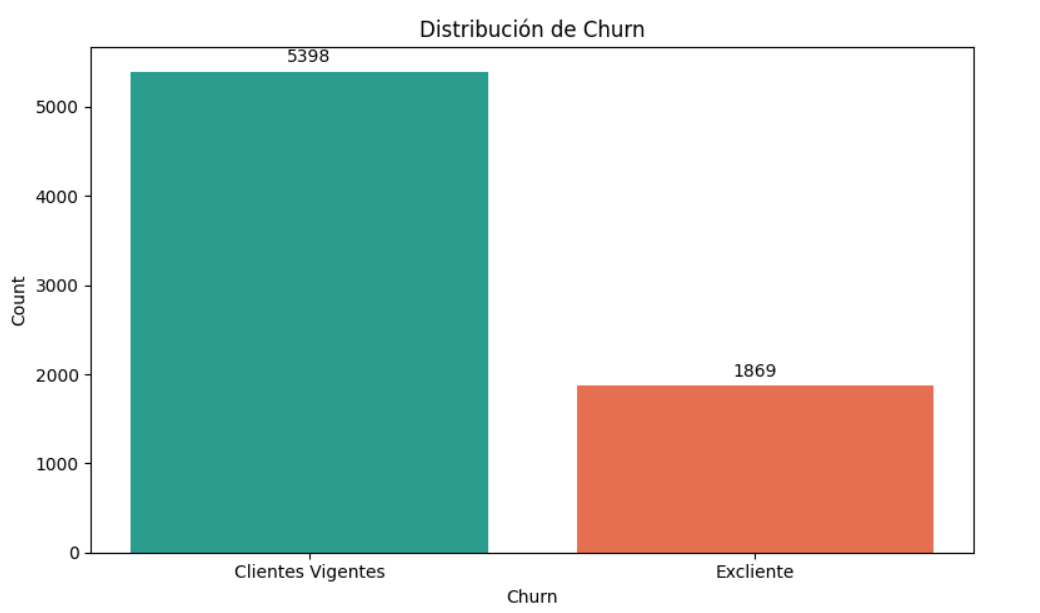

El conjunto de datos incluye 3,675 clientes identificados como masculinos y 3,592 como femeninos.

En el conjunto de datos, **6,560 clientes tienen activo el servicio de telefonía**, y **707 clientes no disponen de dicho servicio.**

En relación con la opción de múltiples líneas, **3,495 clientes no cuentan con este servicio**, mientras que **3,065 sí lo tienen habilitado**. Además, **707 clientes registran la opción "No phone service"**, lo que indica que no poseen servicio de telefonía.

Se registran **3,065 clientes que cuentan con ambos servicios** (telefonía y múltiples líneas), **y no hay clientes que hayan seleccionado “No” en ambos servicios simultáneamente**. Además, **se confirma que 707 clientes no tienen contratado ningún servicio telefónico.**

Respecto al servicio de internet, **3,198 clientes utilizan fibra óptica, 2,488 cuentan con servicio DSL, y 1,581 no tienen servicio de internet contratado.**

La columna **customerID** no presenta valores duplicados, garantizando la unicidad de cada registro.

El conjunto de datos incluye **4,005 contratos mensuales (Month-to-month), 1,743 contratos con duración de dos años (Two year) y 1,519 contratos anuales (One year)**.

Conforme a lo solicitado, se procedió a la creación de la columna **Cuentas Diarias**.

Transformar los valores categóricos **Churn** "Sí" y "No" en representaciones binarias numéricas (1 y 0).

Realizar la transformación de los valores textuales "Sí" y "No" en las columnas **['Partner', 'Dependents']** a valores binarios numéricos (1 y 0).

Transformar los valores categóricos "Sí" y "No" en las columnas **['PhoneService', 'MultipleLines']** a representaciones binarias numéricas (1 y 0).

Realizar la transformación de los valores categóricos "Sí" y "No" en las columnas **['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']** a valores binarios numéricos (1 y 0).

Realizar la transformación de los valores categóricos "Sí" y "No" en la columna **['PaperlessBilling']** a representaciones binarias numéricas (1 y 0).

**Análisis Descriptivo del Churn**

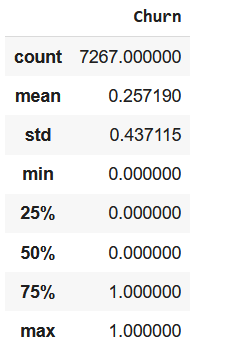

**Análisis descriptivo del SeniorCitizen 	tenure**
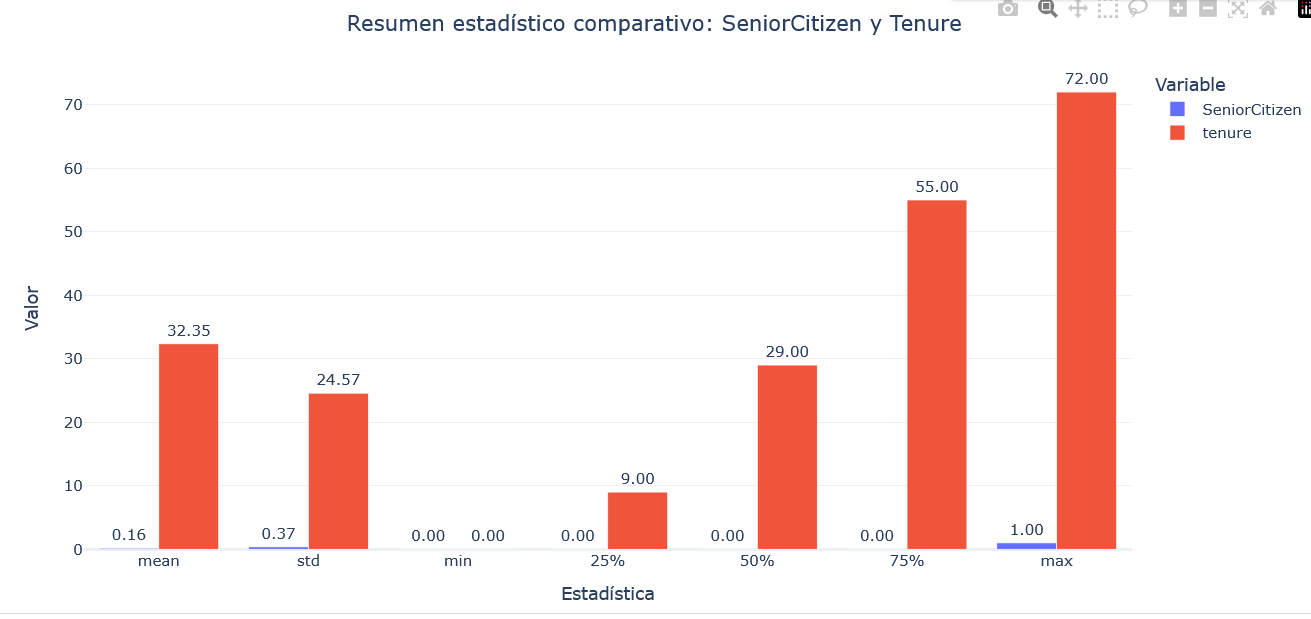


**Análisis descriptivo del PhoneService 	MultipleLines**
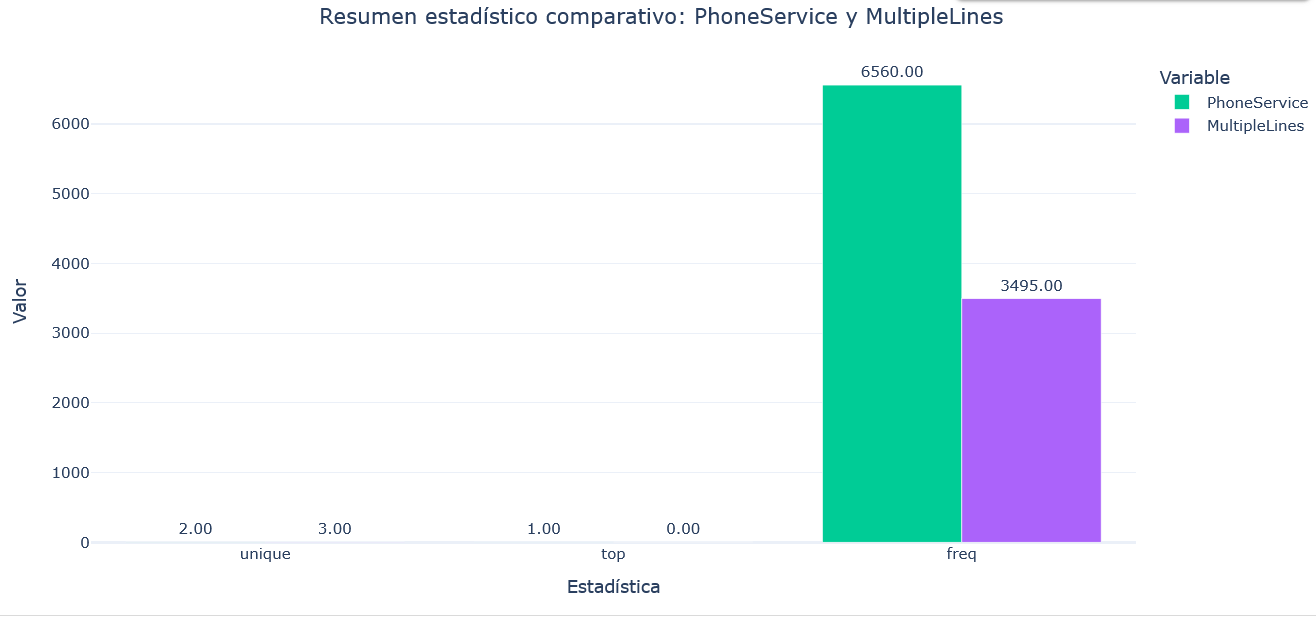


**Análisis descriptivo **InternetService 	OnlineSecurity 	OnlineBackup 	DeviceProtection 	TechSupport 	StreamingTV 	StreamingMovies****

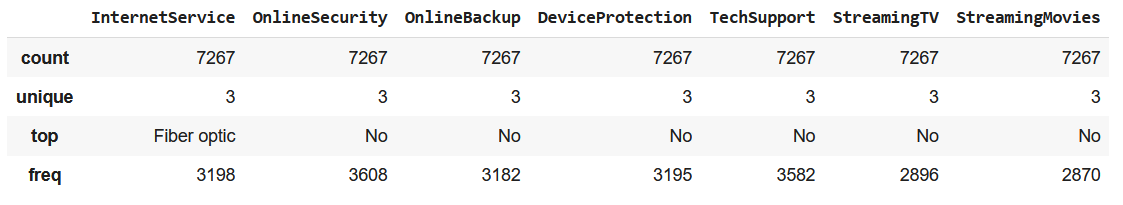

  **Análisis descriptivo Charges.Monthly**

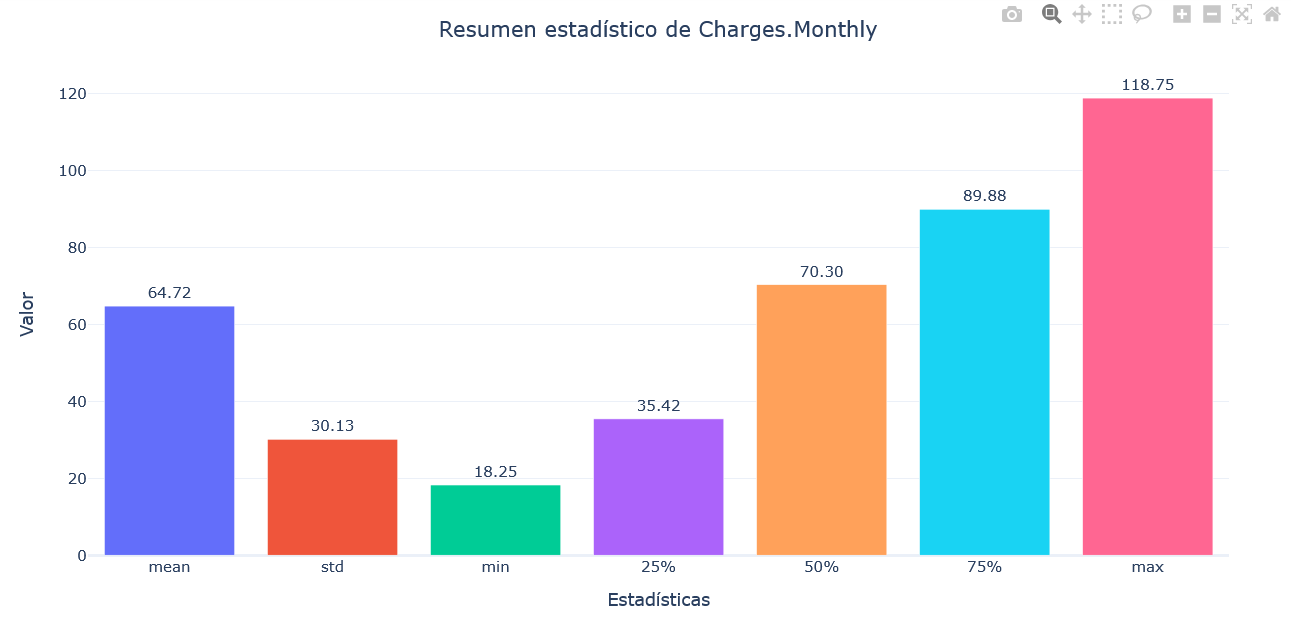

**Análisis descriptivo Charges.Total**
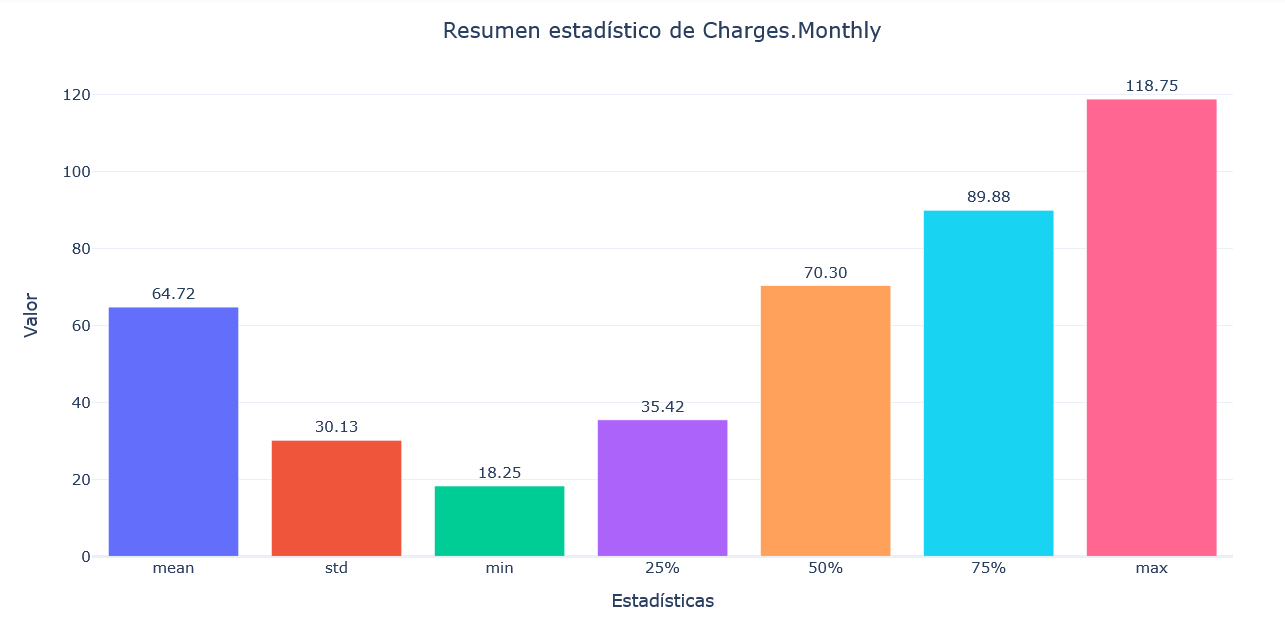

Se generó un nuevo DataFrame donde él campo Churn fue normalizada, transformando sus valores en 0 y 1, donde se agregaron también los 3 campos recomendados para permitir un análisis estadístico más efectivo.

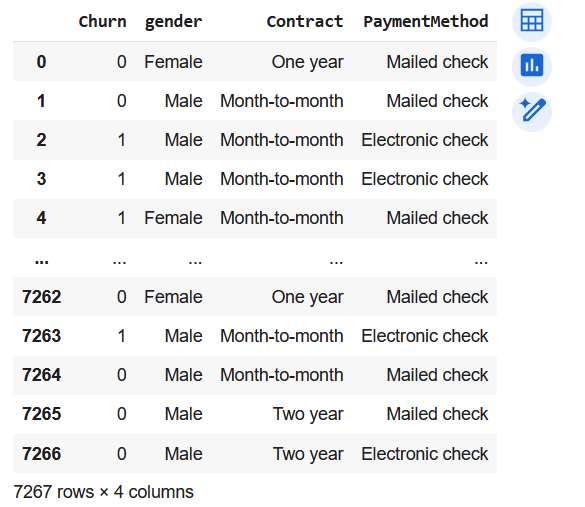

Los clientes que dejaron la empresa tienden a ser en su mayoría **hombres con contratos mes a mes y que pagan mediante cheque electrónico**. Por otro lado, se registraron **492 mujeres** dentro del grupo de clientes que cancelaron el servicio.

**Conteo de evasión por variables numéricas 1**

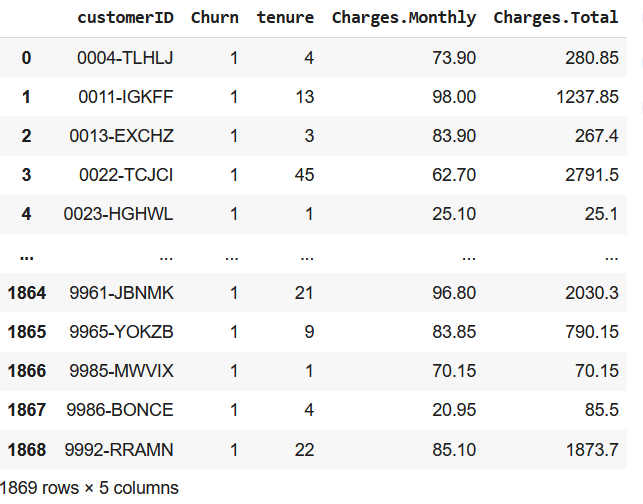

**Conteo de evasión por variables numéricas 0**

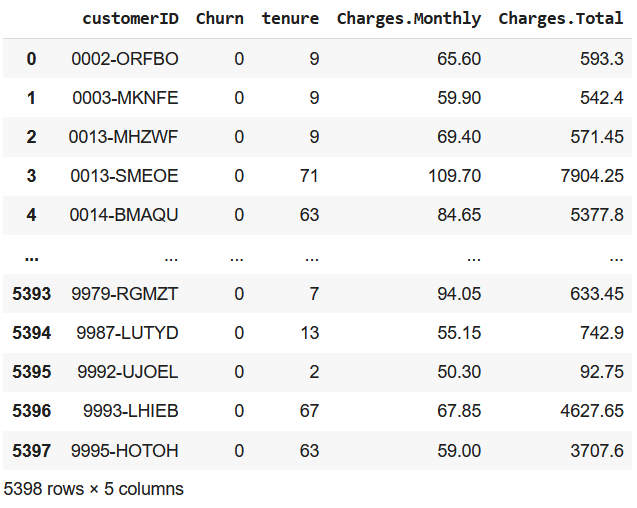

###**Conclusiones e Insights**

**1. Tasa de evasión significativa:**
Se identificaron **1,869 clientes que abandonaron la empresa**, lo que representa un volumen considerable en comparación con los 5,174 clientes activos.

**2. Datos limpios y estructurados:**
No se encontraron valores duplicados en la columna customerID, lo cual garantiza la unicidad de los registros. Sin embargo, 224 registros presentaban datos nulos, y se clasificaron provisionalmente como clientes vigentes para mantener la consistencia del análisis.

**3. Perfil del cliente con mayor riesgo de churn:**

*   Mayoría masculina, con contratos de tipo Month-to-month.

*   Suelen pagar con cheque electrónico, lo que podría estar vinculado a menor fidelidad o automatización.

*   Servicios como PhoneService y MultipleLines están presentes en la mayoría, pero también hay una proporción notable (707) sin ningún servicio telefónico, lo que sugiere un menor compromiso.

**4. Preferencia de servicios de internet:**

*   3,198 clientes utilizan fibra óptica, lo que indica alta demanda, pero también puede estar relacionado con mayor churn si no se cumplen expectativas.

*   1,581 clientes no cuentan con servicio de internet, posiblemente indicando un menor nivel de digitalización o necesidades diferentes.

**5. Transformaciones clave para el análisis:**
Las variables textuales (como "Sí" y "No") fueron normalizadas a valores binarios (1 y 0), facilitando el análisis cuantitativo y la futura aplicación de modelos predictivos.



###**Recomendaciones Estratégicas**

**1. Fomentar contratos de largo plazo:**
Los contratos Month-to-month están altamente asociados con la evasión. Incentivar a los clientes a cambiar a planes anuales o bianuales podría mejorar la retención (p. ej., descuentos exclusivos, beneficios adicionales).

**2. Revisar experiencia de clientes con pago por cheque electrónico:**
Este método de pago está comúnmente presente en los casos de churn. Se recomienda promover métodos más modernos como pagos automáticos, débito o apps móviles con recompensas por uso.

**3. Segmentar campañas según tipo de cliente:**
Crear perfiles basados en género, tipo de contrato y servicios contratados, para personalizar ofertas y comunicaciones que aumenten la fidelidad.

**4. Revisar la experiencia del usuario con fibra óptica:**
Dado que es el servicio de internet más común, pero también puede implicar expectativas altas, se recomienda analizar la satisfacción de estos clientes y ajustar el soporte técnico o la velocidad ofrecida.

**5. Atención a los clientes con servicios mínimos:**
Clientes sin internet o sin PhoneService podrían estar en riesgo por bajo nivel de vinculación. Se pueden ofrecer bundles promocionales o upgrades gratuitos por tiempo limitado.